

# Project: " No-Show Appointments Data Analysis "

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Medical Appointments Dataset contains information on more than 100k medical appointments in Brazil. Focus on predicting whether patients will show up for their appointments or not. By using a number of properties about the patient in each row like (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS Received, No Show). 

### Asking Questions:
> - How many patients come for their appointments, whether female or male?
> - What is the percentage of patients who attend their appointments (females, males)?
> - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> - Are the messages sent proof that patients attend their appointments?
> - Are patients who attend their appointments enrolled in the healthcare program? or not?

In [1]:
# import modules for working with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load data
df = pd.read_csv('No_Show_Appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# displays summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning 

**We take a look at the data summary:**

In [4]:
# prints information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for missing values
df.isnull().sum().sum()

0

> **Note:**
>
> - It appears that the data does not have any missing values.
> - Change data type from String to DateTime object for "ScheduledDay" & "AppointmentDay" columns.
> - It turned out that there was an incorrect entry in the "Age" column "-1" that should be modified.

In [6]:
# Changed data type from String to DateTime object for "ScheduledDay" and "AppointmentDay" columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Getting the wrong row
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# Corrected the wrong entry in the age column
df.replace(-1, 1, inplace=True)
# Check the error correction
df[df['AppointmentID'] == 5775010]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# Check for duplicate rows
df.duplicated().sum()

0

In [10]:
# Check for duplicate rows
df.duplicated('AppointmentID').sum()

0

In [11]:
# Check for duplicate rows
df.duplicated('PatientId').sum()

48228

> - There are no duplicate data or rows except for the patient ID column because there are different test results for the same patient.



<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: How many patients come for their appointments, whether female or male?

In [12]:
# Creating a function to draw a bar chart
def bar_chart(col_1, col_2, xlabel, ylabel, title):
    df.groupby(col_1)[col_2].value_counts().plot(kind="bar", color=['Blue','Red'], alpha=.7);
    plt.xlabel(xlabel, fontsize=15);
    plt.ylabel(ylabel, fontsize=15);
    plt.title(title, fontsize=13);

In [13]:
# Creating a function to draw a pie chart
def pie_chart(col_1, col_2, title):
    counts = df.groupby(col_1)[col_2].value_counts()['No']
    totals = df.groupby(col_1)[col_2].value_counts()['No'].sum()
    proportions = counts / totals
    proportions.plot(kind="pie", autopct="%1.0f%%");
    plt.title(title, fontsize=13);

In [14]:
# Creating a function to calculate percentages
def Percentages(col_1, col_2): 
    counts = df.groupby(col_1)[col_2].value_counts()['No']
    totals = df.groupby(col_1)[col_2].value_counts()['No'].sum()
    proportions = counts / totals
    print(proportions)

In [15]:
# Total counts of unique values "No-Show"
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [16]:
# Total counts of unique values "Gender"
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [17]:
# Getting patients attendance counts by gender
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

> - The number of patients who attend their appointments was 57,246 females and 30,962 males, with a total of 88,208 patients. 

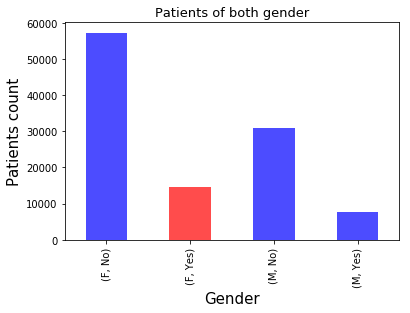

In [18]:
# Drawing a bar chart for patients attendance counts by gender
bar_chart('Gender', 'No-show', 'Gender', 'Patients count', 'Patients of both gender')

> - The blue bar chart shows the number of patients attend their appointments, whether female or male, and the red color represents the number of patients who do not attend their appointments.

### Question 2:  What is the percentage of patients who attend their appointments (females, males)?

In [19]:
# Percentage of patients attend their appointments (females, males):
Percentages('No-show', 'Gender')

Gender
F    0.648989
M    0.351011
Name: Gender, dtype: float64


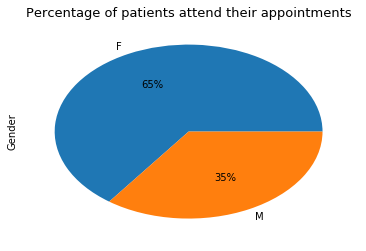

In [20]:
# Drawing a pie chart for Percentage of patients attend their appointments (females, males)
pie_chart('No-show', 'Gender', 'Percentage of patients attend their appointments')

**Percentage of patients attend their appointments (females, males):**
> - The percentage of females is: 65%
> - The percentage of males is: 35%

### Question 3: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [21]:
# Total counts of unique values "Hipertension"
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [22]:
# Getting patients attendance counts by Hipertension
df.groupby('Hipertension')['No-show'].value_counts()

Hipertension  No-show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

> - The number of patients who attend their appointments and who do not suffer from Hypertension is 70,179 patient, while the number of patients suffering from Hypertension is 18,029 patient , with a total of 88,208 patient.

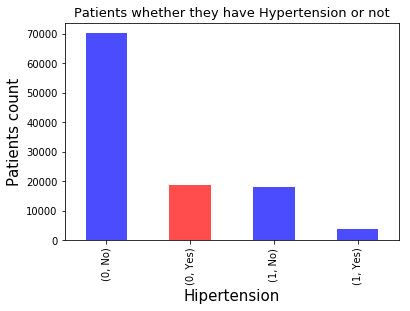

In [23]:
# Drawing a bar chart for patients attendance counts by Hipertension
bar_chart('Hipertension', 'No-show', 'Hipertension', 'Patients count', 'Patients whether they have Hypertension or not')

> - The blue bar chart shows the number of patients who attend their appointments, whether they have Hypertension or not, and the red color represents the number of patients who do not attend their appointments.

In [24]:
# Percentage of patients attending their appointments by Hipertension
Percentages('No-show', 'Hipertension')

Hipertension
0    0.795608
1    0.204392
Name: Hipertension, dtype: float64


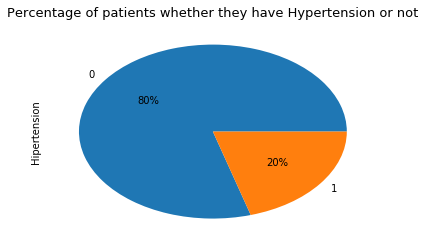

In [25]:
# Drawing a pie chart for Percentage of patients attend their appointments by Hypertension
pie_chart('No-show', 'Hipertension', 'Percentage of patients whether they have Hypertension or not')

> - The pie chart shows the percentage of patients attend their appointments who do not have Hypertension about 80%, while the percentage of patients with Hypertension is about 20%.

In [26]:
# Total counts of unique values "Diabetes"
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [27]:
# Getting patients attendance counts by Diabetes
df.groupby('Diabetes')['No-show'].value_counts()

Diabetes  No-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

> - The number of patients who attend their appointments don't have diabetes is 81,695 patient, while the number of those with diabetes is 6513 patient, with a total of 88,208 patient.

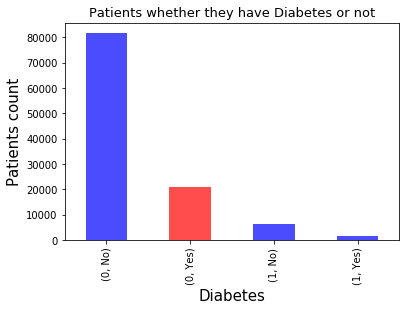

In [28]:
# Drawing a bar chart for patients attendance counts by Diabetes
bar_chart('Diabetes', 'No-show', 'Diabetes', 'Patients count', 'Patients whether they have Diabetes or not')

> - The blue bar chart shows the number of patients who attend their appointments, whether they have diabetes or not, and the red color represented the number of patients who did not attend their appointments.

In [29]:
# Percentage of patients attending their appointments by Diabetes
Percentages('No-show', 'Diabetes')

Diabetes
0    0.926163
1    0.073837
Name: Diabetes, dtype: float64


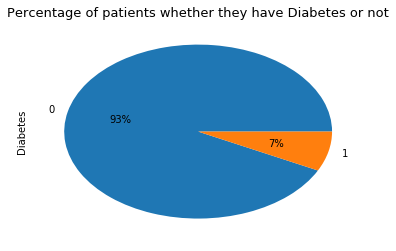

In [30]:
# Drawing a pie chart for Percentage of patients attend their appointments by Diabetes
pie_chart('No-show', 'Diabetes', 'Percentage of patients whether they have Diabetes or not')

> - The pie chart shows the percentage of patients who attend their appointments and do not suffer from diabetes about 93%, while the percentage of patients with diabetes is about 7%.

In [31]:
# Total counts of unique values "Alcoholism"
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [32]:
# Getting patients attendance counts by Alcoholism
df.groupby('Alcoholism')['No-show'].value_counts()

Alcoholism  No-show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: No-show, dtype: int64

> - The number of patients attend their appointments who do not suffer from alcoholism is 85,525 patient, while the number of those who suffer from alcoholism is 2,683 patient, with a total of 88,208 patient.

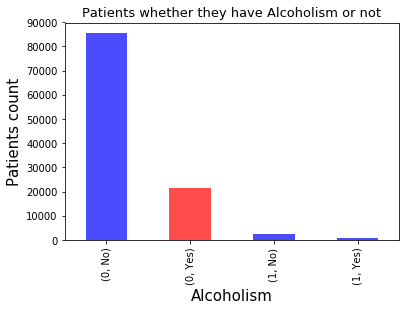

In [33]:
# Drawing a bar chart for patients attendance counts by Alcoholism
bar_chart('Alcoholism', 'No-show', 'Alcoholism', 'Patients count', 'Patients whether they have Alcoholism or not')

> - The blue bar chart shows the number of patients who attend their appointments, whether they have alcoholism or not, and the red color represented the number of patients who did not attend their appointments.

In [34]:
# Percentage of patients attending their appointments by Alcoholism
Percentages('No-show', 'Alcoholism')

Alcoholism
0    0.969583
1    0.030417
Name: Alcoholism, dtype: float64


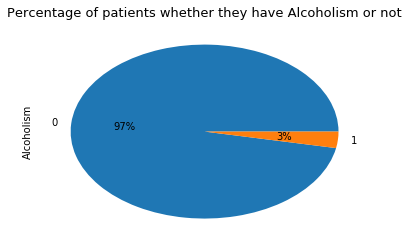

In [35]:
# Drawing a pie chart for Percentage of patients attend their appointments by Alcoholism
pie_chart('No-show', 'Alcoholism', 'Percentage of patients whether they have Alcoholism or not')

> - The pie chart shows that the percentage of patients who attend their appointments and do not suffer from alcoholism is about 97%, while the percentage of those who suffer from alcoholism is about 3%.

In [36]:
# Total counts of unique values "Handcap"
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [37]:
# Getting patients attendance counts by Handcap
df.groupby('Handcap')['No-show'].value_counts()

Handcap  No-show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: No-show, dtype: int64

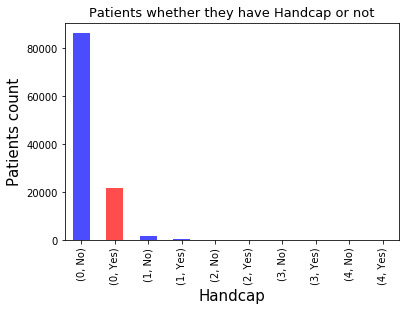

In [38]:
# Drawing a bar chart for patients attendance counts by Handcap
bar_chart('Handcap', 'No-show', 'Handcap', 'Patients count', 'Patients whether they have Handcap or not')

> - The blue bar chart shows the number of patients who attend their appointments, whether they have handicap or not, and the red color represented the number of patients who did not attend their appointments.

In [39]:
# Percentage of patients attending their appointments by handicap
Percentages('No-show', 'Handcap')

Handcap
0    0.979208
1    0.019001
2    0.001655
3    0.000113
4    0.000023
Name: Handcap, dtype: float64


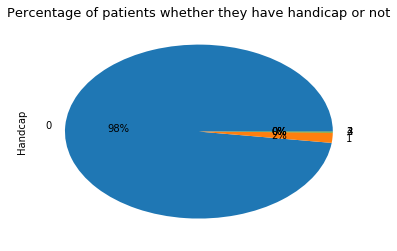

In [40]:
# Drawing a pie chart for Percentage of patients attend their appointments by handicap
pie_chart('No-show', 'Handcap', 'Percentage of patients whether they have handicap or not')

> - The pie chart shows that the percentage of patients who attend their appointments who don't have handicap is about 98%, while those who have a handicap are about 2%.

### Question 4: Are the messages sent proof that patients attend their appointments?

In [41]:
# Total counts of unique values "SMS_received"
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [42]:
# Getting patients attendance counts by SMS_received
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

> - The number of patients attend their appointments who did not receive SMS is 62,510 patient, while the number of those who received SMS is 25,698 patient, with a total of 88,208 patient.

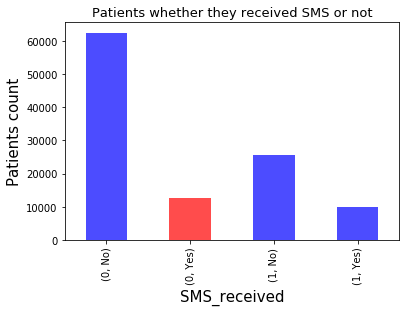

In [43]:
# Drawing a bar chart for patients attendance counts by SMS_received
bar_chart('SMS_received', 'No-show', 'SMS_received', 'Patients count', 'Patients whether they received SMS or not')

> - The blue bar chart shows the number of patients who attend their appointments, whether they received SMS or not, and the red color represents the number of patients who did not attend their appointments.

In [44]:
# Percentage of patients attending their appointments by SMS_received
Percentages('No-show', 'SMS_received')

SMS_received
0    0.708666
1    0.291334
Name: SMS_received, dtype: float64


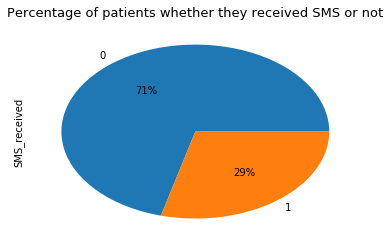

In [45]:
# Drawing a pie chart for Percentage of patients attend their appointments by received SMS
pie_chart('No-show', 'SMS_received', 'Percentage of patients whether they received SMS or not')

> - The pie chart shows that the percentage of patients who attend their appointments and did not receive SMS was about 71%, while the percentage of those who received SMS was about 29%.

### Question 5: Are patients who attend their appointments enrolled in the healthcare program? or not?

In [46]:
# Total counts of unique values "Scholarship"
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [47]:
# Getting patients attendance counts by Scholarship
df.groupby('Scholarship')['No-show'].value_counts()

Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

> - The number of patients who attend their appointments who were not registered in the health care program is 79,925 patient , while the number of those registered in the health care program is 8283 patient, with a total of 88,208 patient.

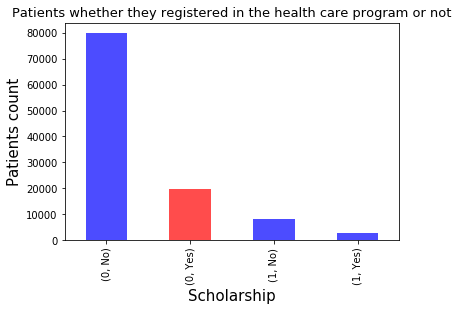

In [48]:
# Drawing a bar chart for patients attendance counts by Scholarship
bar_chart('Scholarship', 'No-show', 'Scholarship', 'Patients count', 'Patients whether they registered in the health care program or not')

> - The blue bar chart shows the number of patients who attend their appointments, whether they registered in the health care program or not, and the red color represents the number of patients who did not attend their appointments.

In [49]:
# Percentage of patients attending their appointments by Scholarship
Percentages('No-show', 'Scholarship')

Scholarship
0    0.906097
1    0.093903
Name: Scholarship, dtype: float64


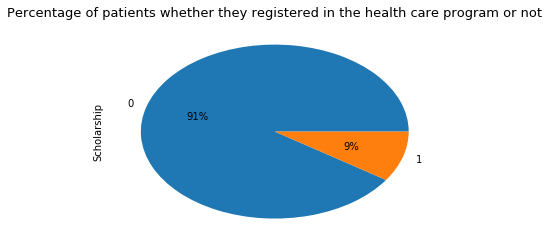

In [50]:
# Drawing a pie chart for Percentage of patients attend their appointments by Scholarship
pie_chart('No-show', 'Scholarship', 'Percentage of patients whether they registered in the health care program or not')

> - The pie chart shows that the percentage of patients attend their appointments who were not registered in the health care program is about 91%, while the percentage of those registered in the health care program is about 9%.

**Addition of a bivariate plot to show the relationship between age and gender:**

In [51]:
# Createing a data set from the selected columns
selected_columns = df[["Gender","Age"]]
new_df = selected_columns.copy()

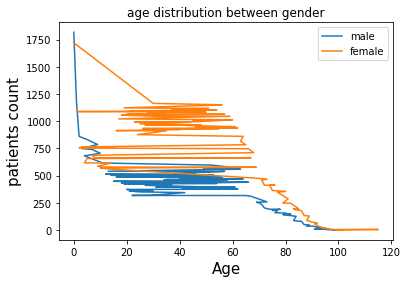

In [52]:
# age distribution between the gender
counts_male = new_df.groupby('Gender')['Age'].value_counts()['M']
counts_female = new_df.groupby('Gender')['Age'].value_counts()['F']
# Drawing a plot chart
counts_male.plot(legend=True, label = "male");
counts_female.plot(legend=True, label = "female");
plt.xlabel('Age', fontsize=15)
plt.ylabel('patients count', fontsize=15)
plt.title("age distribution between gender")
plt.show()

<a id='conclusions'></a>
## Conclusions



**analysis a data set using a number of related variables with No-Show as follows:**
- The number of patients who attend their appointments is 57,246 females and 30,962 males, with a total of 88,208 patient.
- The percentage of patients who attend their appointments for females and males, percentage of females is: 65%, while the percentage of males is: 35%.
- The number of patients who attend their appointments and who do not suffer from Hypertension is 70,179 patient (Percentage to 80%), while the number of patients suffering from Hypertension is 18,029 patient (Percentage to 20%), with a total of 88,208 patient.
- The number of patients who attend their appointments don't have diabetes is 81,695 patient (Percentage to 93%), while the number of those with diabetes is 6513 patient (Percentage to 7%), with a total of 88,208 patient.
- The number of patients attend their appointments who do not suffer from alcoholism is 85,525 patient (Percentage to 97%), while the number of those who suffer from alcoholism is 2,683 patient (Percentage to 3%), with a total of 88,208 patient.
- The percentage of patients who attend their appointments who don't have handicap is about 98%, while those who have a handicap are about 2%.
- The number of patients attend their appointments who did not receive SMS is 62,510 patient (Percentage to 71%), while the number of those who received SMS is 25,698 patient (Percentage to 29%) with a total of 88,208 patient.
- The number of patients who attend their appointments who were not registered in the health care program is 79,925 patient (Percentage to 91%), while the number of those registered in the health care program is 8283 patient (Percentage to 9%), with a total of 88,208 patient.

### Limitations:
> **I did not explore the following:**
> - Neighborhood influence.
> - The time difference between the scheduled day and the appointment day.
> - They were not used when calculating the percentage of patients attend their appointments.

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0